### Installing Dependicies

In [ ]:
#Install Packages
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Successfully installed wordcloud-1.8.0



Import the required packages that is to be used 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import sklearn
import pickle
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold,cross_val_score,learning_curve


## Preprocessing and Exploring the Dataset

Importing the Dataset spam.csv

The data can be downloaded from https://github.com/akshaybhatia10/SMS-Spam-Classification/tree/master/data

In [ ]:
data = pd.read_csv('data/spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Removing unwanted columns

In [ ]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v2" : "text", "v1":"label"})

In [ ]:
data[1990:2000]

,label,text
1990,ham,HI DARLIN IVE JUST GOT BACK AND I HAD A REALLY...
1991,ham,No other Valentines huh? The proof is on your ...
1992,spam,Free tones Hope you enjoyed your new content. ...
1993,ham,Eh den sat u book e kb liao huh...
1994,ham,Have you been practising your curtsey?
1995,ham,Shall i come to get pickle
1996,ham,Lol boo I was hoping for a laugh
1997,ham,\YEH I AM DEF UP4 SOMETHING SAT
1998,ham,"Well, I have to leave for my class babe ... Yo..."
1999,ham,LMAO where's your fish memory when I need it?


In [ ]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

# Distribution of length of spam and ham messages

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC7BC44520>,
      dtype=object)

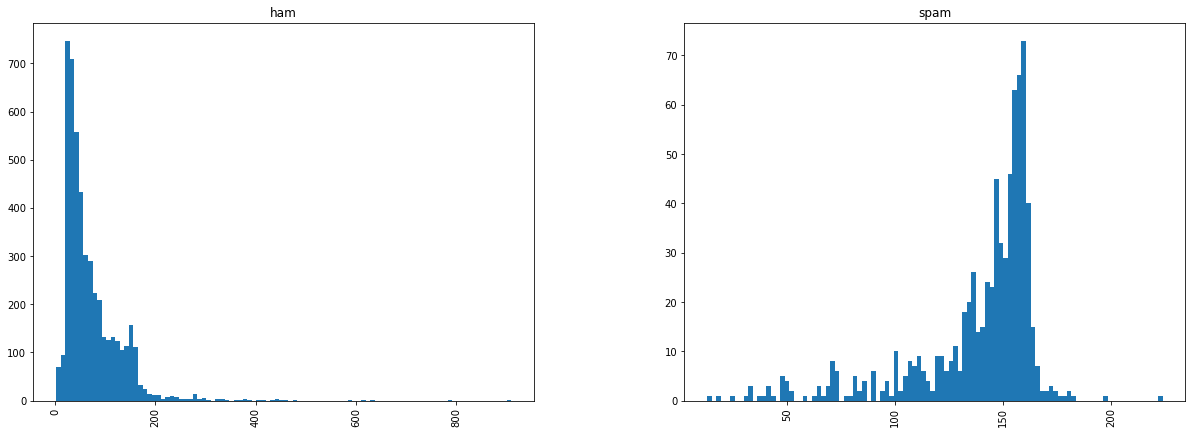

In [ ]:
#Overall length of length of spam and ham messages
data.hist(column='length', by='label', bins=100, figsize=(20,7))

In [ ]:
# Import nltk packages and Punkt Tokenizer Models
import nltk
nltk.download("punkt")
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### WordClouds- to see which words are common in SPAM and NOT SPAM mesaages

In [ ]:
ham_words = ''
spam_words = ''

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Creating a corpus of spam messages
for val in data[data['label'] == 'spam'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '
# Creating a corpus of ham messages        
for val in data[data['label'] == 'ham'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

# Creating  Spam wordcloud and ham wordcloud

In [ ]:
spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words)
ham_wordcloud = WordCloud(width=500, height=300).generate(ham_words)

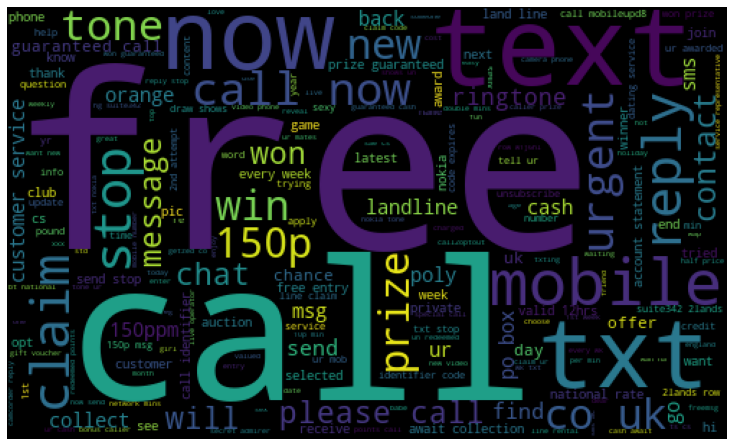

In [ ]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

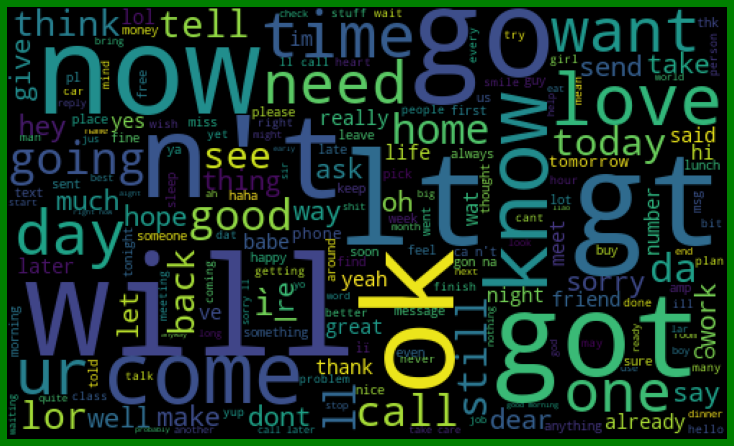

In [ ]:
#Creating Ham wordcloud
plt.figure( figsize=(10,8), facecolor='g')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
data = data.replace(['ham','spam'],[0, 1]) 

In [ ]:
data.head(10)

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148
6,0,Even my brother is not like to speak with me. ...,77
7,0,As per your request 'Melle Melle (Oru Minnamin...,160
8,1,WINNER!! As a valued network customer you have...,158
9,1,Had your mobile 11 months or more? U R entitle...,154


### Removing Stopwords from the messages

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Remove punctuation  and stopwords

In [ ]:
import string
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [ ]:
data['text'] = data['text'].apply(text_process)

In [ ]:
data.head()

,label,text,length
0,0,Go jurong point crazy Available bugis n great ...,111
1,0,Ok lar Joking wif u oni,29
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...,155
3,0,U dun say early hor U c already say,49
4,0,Nah dont think goes usf lives around though,61


In [ ]:
text = pd.DataFrame(data['text'])
label = pd.DataFrame(data['label'])

## Converting words to vectors



In [ ]:
## Counting how many times a word appears in the dataset

from collections import Counter

total_counts = Counter()
for i in range(len(text)):
    for word in text.values[i][0].split(" "):
        total_counts[word] += 1

print("Total words in data set: ", len(total_counts))

Total words in data set:  11305


In [ ]:
total_counts

Counter({'Go': 14,
         'jurong': 1,
         'point': 12,
         'crazy': 12,
         'Available': 3,
         'bugis': 6,
         'n': 137,
         'great': 86,
         'world': 20,
         'la': 7,
         'e': 73,
         'buffet': 2,
         'Cine': 1,
         'got': 206,
         'amore': 1,
         'wat': 68,
         'Ok': 147,
         'lar': 38,
         'Joking': 1,
         'wif': 26,
         'u': 778,
         'oni': 4,
         'Free': 46,
         'entry': 25,
         '2': 478,
         'wkly': 10,
         'comp': 11,
         'win': 39,
         'FA': 4,
         'Cup': 3,
         'final': 13,
         'tkts': 4,
         '21st': 3,
         'May': 18,
         '2005': 3,
         'Text': 43,
         '87121': 4,
         'receive': 35,
         'questionstd': 2,
         'txt': 77,
         'rateTCs': 2,
         'apply': 29,
         '08452810075over18s': 2,
         'U': 341,
         'dun': 46,
         'say': 83,
         'early': 32,
         '

In [ ]:
# Sorting in decreasing order (Word with highest frequency appears first)
vocab = sorted(total_counts, key=total_counts.get, reverse=True)
print(vocab[:60])

['u', '2', 'call', 'U', 'get', 'Im', 'ur', '4', 'ltgt', 'know', 'go', 'like', 'dont', 'come', 'got', 'time', 'day', 'want', 'Ill', 'lor', 'Call', 'home', 'send', 'going', 'one', 'need', 'Ok', 'good', 'love', 'back', 'n', 'still', 'text', 'im', 'later', 'see', 'da', 'ok', 'think', 'Ì', 'free', 'FREE', 'r', 'today', 'Sorry', 'week', 'phone', 'mobile', 'cant', 'tell', 'take', 'much', 'night', 'way', 'Hey', 'reply', 'work', 'make', 'give', 'new']


In [ ]:
# Mapping from words to index

vocab_size = len(vocab)
word2idx = {}
#print vocab_size
for i, word in enumerate(vocab):
    word2idx[word] = i

In [ ]:
# Text to Vector
def text_to_vector(text):
    word_vector = np.zeros(vocab_size)
    for word in text.split(" "):
        if word2idx.get(word) is None:
            continue
        else:
            word_vector[word2idx.get(word)] += 1
    return np.array(word_vector)

In [ ]:
# Convert all titles to vectors
word_vectors = np.zeros((len(text), len(vocab)), dtype=np.int_)
for i, (_, text_) in enumerate(text.iterrows()):
    word_vectors[i] = text_to_vector(text_[0])

In [ ]:
vocab_size,len(text), len(vocab)

(11305, 5572, 11305)

In [ ]:
word_vectors.shape

(5572, 11305)

## Converting words to vectors using TFIDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['text'])
vectors.shape

In [ ]:
#features = word_vectors
features = vectors

### Splitting into training and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, data['label'], test_size=0.15, random_state=111)

In [ ]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(4736, 9376)
(836, 9376)
(4736,)
(836,)


## Classifying using sklearn pre built classifiers

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [ ]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc}

In [ ]:
def train(clf, features, targets):    
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

In [ ]:
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred)]))

## Predictions using TFIDF Vectorizer algorithm

In [ ]:
pred_scores_word_vectors

[('SVC', [0.9784688995215312]),
 ('KN', [0.9330143540669856]),
 ('NB', [0.9880382775119617]),
 ('DT', [0.9605263157894737]),
 ('LR', [0.9533492822966507]),
 ('RF', [0.9796650717703349])]

## Result





In [ ]:
def find(x):
    if x == 1:
        print ("Message is SPAM")
    else:
        print ("Message is NOT Spam")

In [ ]:
newtext = ["Free tones Hope you enjoyed your new content"]
integers = vectorizer.transform(newtext)

In [ ]:
x = mnb.predict(integers)[0]
find(x)        

Message is SPAM
